# Lake Effect

We have heard of "lake effect", normally when it comes to snow, but Lake Michigan affects the weather around Chicago in many ways.

__How does the lake affect temperatures in the city?__ 

You have access to 3 data sets:
1. A list of all of the nodes: `nodes.csv`
2. A snapshot of temperature readings for July 18, 2019 at about 3pm: `July18_2019.csv`
3. A series of latitude and longitude reference points for the lakeshore: `Chicago_Lakefront.csv`


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn')

In [2]:
nodes = pd.read_csv("../../Datasets/AoT/nodes.csv")

In [3]:
nodes.head()

,node_id,project_id,vsn,address,lat,lon,description,start_timestamp,end_timestamp
0,001e0610ba46,AoT_Chicago,4,State St & Jackson Blvd Chicago IL,41.878377,-87.627678,AoT Chicago (S) [C],10/9/17 0:00,NaN
1,001e0610ba3b,AoT_Chicago,6,18th St & Lake Shore Dr Chicago IL,41.858136,-87.616055,AoT Chicago (S),8/8/17 0:00,NaN
2,001e0610ba8f,AoT_Chicago,00D,Cornell & 47th St Chicago IL,41.810342,-87.590228,AoT Chicago (S),8/8/17 0:00,NaN
3,001e0610ba16,AoT_Chicago,10,Homan Ave & Roosevelt Rd Chicago IL,41.866349,-87.710543,AoT Chicago (S) [C],7/18/18 0:00,NaN
4,001e0610ba8b,AoT_Chicago,18,Stony Island Ave & 63rd St Chicago IL,41.780600,-87.586456,AoT Chicago (S) [C],2/26/18 0:00,NaN


In [4]:
nodes['node_id'].describe()

count              122
unique             122
top       001e0610ba8b
freq                 1
Name: node_id, dtype: object

### Import Chicago_Lakefront.csv which contains lat/long reference points for the shoreline in Chicago


In [5]:
shoreline = pd.read_csv('../../Datasets/AoT/Chicago_Lakefront.csv')

In [6]:
shoreline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  55 non-null     float64
 1   Latitude   55 non-null     float64
dtypes: float64(2)
memory usage: 1008.0 bytes


### Let's create 2 empty columns. This is where we will put our calculated distances between each node and the shore.

In [7]:
shoreline['distance'] = np.nan
nodes['lake_distance'] = np.nan

In [8]:
# diff in lat alone didn't work because of the curve of the lake.

for i in range (len(nodes)):
    node_lon = abs(nodes['lon'].iloc[i])
    node_lat = abs(nodes['lat'].iloc[i])
    for j in range (len(shoreline)):
        lon_diff = node_lon - abs(shoreline['Longitude'].iloc[j])
        lat_diff = node_lat - abs(shoreline['Latitude'].iloc[j])
        distance_to_lake = np.sqrt(lon_diff ** 2 + lat_diff ** 2)
        shoreline['distance'].iloc[j] = distance_to_lake 
    distance = shoreline['distance'].min()
    nodes['lake_distance'].iloc[i] = distance

/Users/papka/opt/anaconda3/envs/jupyter/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
nodes.head()

,node_id,project_id,vsn,address,lat,lon,description,start_timestamp,end_timestamp,lake_distance
0,001e0610ba46,AoT_Chicago,4,State St & Jackson Blvd Chicago IL,41.878377,-87.627678,AoT Chicago (S) [C],10/9/17 0:00,NaN,0.016218
1,001e0610ba3b,AoT_Chicago,6,18th St & Lake Shore Dr Chicago IL,41.858136,-87.616055,AoT Chicago (S),8/8/17 0:00,NaN,0.001728
2,001e0610ba8f,AoT_Chicago,00D,Cornell & 47th St Chicago IL,41.810342,-87.590228,AoT Chicago (S),8/8/17 0:00,NaN,0.007262
3,001e0610ba16,AoT_Chicago,10,Homan Ave & Roosevelt Rd Chicago IL,41.866349,-87.710543,AoT Chicago (S) [C],7/18/18 0:00,NaN,0.096554
4,001e0610ba8b,AoT_Chicago,18,Stony Island Ave & 63rd St Chicago IL,41.780600,-87.586456,AoT Chicago (S) [C],2/26/18 0:00,NaN,0.015089


In [10]:
nodes['lake_distance'] = nodes['lake_distance'].apply(lambda x: x*69)

In [11]:
nodes['lake_distance'].describe()

count    122.000000
mean       3.864627
std        2.553650
min        0.119241
25%        1.686029
50%        3.561889
75%        5.170477
max       13.231529
Name: lake_distance, dtype: float64

### Importing the temperature.csv which contains the nodes and their corresponding temperature values for one time step.

In [12]:
temp_snapshot = pd.read_csv('../../Datasets/AoT/July18_2019.csv')

In [13]:
temp_snapshot.head()

,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf
0,2019/07/18 14:00:00,001e0610ee36,metsense,pr103j2,temperature,840,24.45
1,2019/07/18 14:00:00,001e06114fd4,metsense,pr103j2,temperature,839,24.30
2,2019/07/18 14:00:01,001e0610ba13,metsense,pr103j2,temperature,853,26.45
3,2019/07/18 14:00:02,001e0610ee61,metsense,pr103j2,temperature,850,26.00
4,2019/07/18 14:00:02,001e06113ad8,metsense,pr103j2,temperature,837,24.00


In [14]:
temp_snapshot['Temperature_F'] = temp_snapshot['value_hrf'].apply(lambda x: x*(9/5) + 32)

In [15]:
temp_snapshot.head()

,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf,Temperature_F
0,2019/07/18 14:00:00,001e0610ee36,metsense,pr103j2,temperature,840,24.45,76.01
1,2019/07/18 14:00:00,001e06114fd4,metsense,pr103j2,temperature,839,24.30,75.74
2,2019/07/18 14:00:01,001e0610ba13,metsense,pr103j2,temperature,853,26.45,79.61
3,2019/07/18 14:00:02,001e0610ee61,metsense,pr103j2,temperature,850,26.00,78.80
4,2019/07/18 14:00:02,001e06113ad8,metsense,pr103j2,temperature,837,24.00,75.20


In [16]:
temp_snapshot.describe()

,value_raw,value_hrf,Temperature_F
count,41.000000,40.000000,40.000000
mean,818.780488,24.303750,75.746750
std,127.924687,2.003279,3.605902
min,24.000000,19.550000,67.190000
25%,833.000000,23.400000,74.120000
50%,840.000000,24.450000,76.010000
75%,845.000000,25.237500,77.427500
max,866.000000,28.650000,83.570000


There is definitely some variance in the temperatures accross the city, but is this related to how far a node is from the lake?

In [17]:
temps_nodes = temp_snapshot[['node_id', 'Temperature_F']]

# 2 brackets needs because you are filtering columns

In [18]:
temps_nodes.head()

,node_id,Temperature_F
0,001e0610ee36,76.01
1,001e06114fd4,75.74
2,001e0610ba13,79.61
3,001e0610ee61,78.80
4,001e06113ad8,75.20


# Scatter Plot

Is there a correlation between the distance from the lake and the temperature? The quickest way to visualize this is through a scatter plot.

A scatter plot is made by pairing an x and y value. In this case we want temperature and distance from the lake. However, these 2 variables are in different datasets. We also have the problem that there are 122 different nodes, but we only have temperatures for 40 of them. Therefore, we will only be able to make 40 pairs.

To do this, we need to find a connection between the 2 datasets. This is known as a "key" and will allow us to combine the 2 datasets. If a temperature and a distance have the same key, we can merge them to the same row.

__What should our key be?__

In [19]:
distance_temps = pd.merge(nodes, temps_nodes, on = 'node_id')

In [20]:
distance_temps.head()

,node_id,project_id,vsn,address,lat,lon,description,start_timestamp,end_timestamp,lake_distance,Temperature_F
0,001e0610ba46,AoT_Chicago,4,State St & Jackson Blvd Chicago IL,41.878377,-87.627678,AoT Chicago (S) [C],10/9/17 0:00,NaN,1.119032,76.01
1,001e0610bc10,AoT_Chicago,01F,State St & 87th Chicago IL,41.736314,-87.624179,AoT Chicago (S) [C],2/22/18 0:00,NaN,4.894850,68.18
2,001e0610bbf9,AoT_Chicago,20,Western Ave & 69th St Chicago IL,41.768319,-87.683396,AoT Chicago (S) [C],2/13/18 0:00,NaN,7.108067,77.36
3,001e0610ba15,AoT_Chicago,02A,Jeffrey Ave & 95th St Chicago IL,41.722457,-87.575350,AoT Chicago (S) [C],2/22/18 0:00,NaN,3.202265,NaN
4,001e0610ee61,AoT_Chicago,03F,Pulaski Rd & Madison St Chicago IL,41.880732,-87.725660,AoT Chicago (S),11/20/17 0:00,NaN,7.297088,78.80


Text(0, 0.5, 'Temperature (F)')

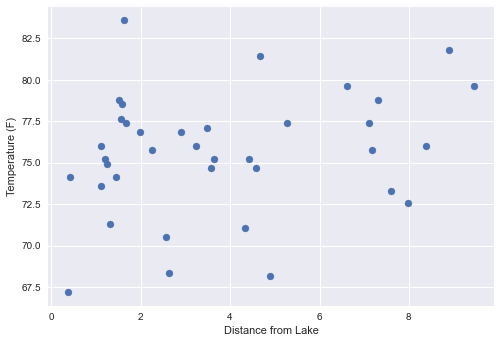

In [21]:
plt.scatter(distance_temps['lake_distance'], distance_temps['Temperature_F'])
plt.xlabel('Distance from Lake')
plt.ylabel('Temperature (F)')

It looks like there might be a correlation. We can perform a linear regression using Seaborn,

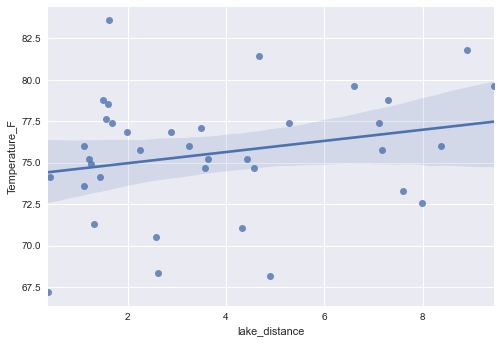

In [22]:
sns.regplot(distance_temps['lake_distance'], distance_temps['Temperature_F'])